<a href="https://colab.research.google.com/github/ngabo-dev/Formative-2_Data-Preprocessing_Group-6/blob/main/Data_Preprocessing_Group_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2: Image Data Collection and Processing
### Multimodal Authentication System - Facial Recognition Component

**Team Members:** Jean Pierre, Omar, Bellox, Deolinda, KING


### 1. Install Dependencies and Import Libraries

In [1]:
# Import all required libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import seaborn as sns
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")
print("OpenCV version:", cv2.__version__)

ModuleNotFoundError: No module named 'cv2'

### 2. Setup Team Members and Create Directory Structure

In [ ]:
# Define team members
TEAM_MEMBERS = ["Jean_Pierre", "Omar", "Bellox", "Deolinda", "KING"]
EXPRESSIONS = ["neutral", "smiling", "surprised"]

# Create directory structure if not exists
for member in TEAM_MEMBERS:
    member_dir = Path(f"/content/{member}")
    member_dir.mkdir(exist_ok=True)
    print(f"📁 Directory ready for: {member}")

# Create output directories
Path("/content/augmented_images").mkdir(exist_ok=True)
Path("/content/features").mkdir(exist_ok=True)

print(f"\n✅ Directory structure ready for {len(TEAM_MEMBERS)} team members")
print("📋 Expected images per member:", EXPRESSIONS)

📁 Directory ready for: Jean_Pierre
📁 Directory ready for: Omar
📁 Directory ready for: Bellox
📁 Directory ready for: Deolinda
📁 Directory ready for: KING

✅ Directory structure ready for 5 team members
📋 Expected images per member: ['neutral', 'smiling', 'surprised']


### 3. Upload and Load Images
Upload your images to the respective member folders, then run this cell to load them.

In [ ]:
class ImageLoader:
    def __init__(self):
        self.team_members = TEAM_MEMBERS
        self.expressions = EXPRESSIONS
        self.loaded_images = {}

    def load_all_images(self):
        """Load all images from member folders"""
        missing_images = []

        for member in self.team_members:
            self.loaded_images[member] = {}

            for expression in self.expressions:
                image_path = f"/content/{member}/{expression}.jpeg"

                if os.path.exists(image_path):
                    try:
                        # Load with OpenCV
                        img = cv2.imread(image_path)
                        if img is not None:
                            self.loaded_images[member][expression] = {
                                'path': image_path,
                                'image': img,
                                'shape': img.shape
                            }
                            print(f"✅ Loaded: {member} - {expression} - Shape: {img.shape}")
                        else:
                            missing_images.append(f"{member}/{expression}.jpeg - Could not read image")
                    except Exception as e:
                        missing_images.append(f"{member}/{expression}.jpeg - Error: {str(e)}")
                else:
                    missing_images.append(f"{member}/{expression}.jpeg - File not found")

        if missing_images:
            print("\n❌ Missing or problematic images:")
            for missing in missing_images:
                print(f"   - {missing}")
        else:
            print(f"\n🎉 All images loaded successfully!")

        return len(missing_images) == 0

    def get_image_summary(self):
        """Get summary of loaded images"""
        total_images = 0
        for member in self.loaded_images:
            total_images += len(self.loaded_images[member])

        print(f"\n📊 IMAGE SUMMARY:")
        print(f"   Total members: {len(self.team_members)}")
        print(f"   Expected images per member: {len(self.expressions)}")
        print(f"   Total expected images: {len(self.team_members) * len(self.expressions)}")
        print(f"   Total loaded images: {total_images}")

        return total_images

# Initialize loader and load images
loader = ImageLoader()
success = loader.load_all_images()
total_loaded = loader.get_image_summary()

✅ Loaded: Omar - neutral - Shape: (1280, 1280, 3)
✅ Loaded: Omar - smiling - Shape: (1280, 1280, 3)
✅ Loaded: Omar - surprised - Shape: (1280, 1280, 3)

❌ Missing or problematic images:
   - Jean_Pierre/neutral.jpeg - File not found
   - Jean_Pierre/smiling.jpeg - File not found
   - Jean_Pierre/surprised.jpeg - File not found
   - Bellox/neutral.jpeg - File not found
   - Bellox/smiling.jpeg - File not found
   - Bellox/surprised.jpeg - File not found
   - Deolinda/neutral.jpeg - File not found
   - Deolinda/smiling.jpeg - File not found
   - Deolinda/surprised.jpeg - File not found
   - KING/neutral.jpeg - File not found
   - KING/smiling.jpeg - File not found
   - KING/surprised.jpeg - File not found

📊 IMAGE SUMMARY:
   Total members: 5
   Expected images per member: 3
   Total expected images: 15
   Total loaded images: 3


### 4. Display Sample Images (Neutral, Smiling, Surprised)
Visualize all loaded images in an organized grid format.

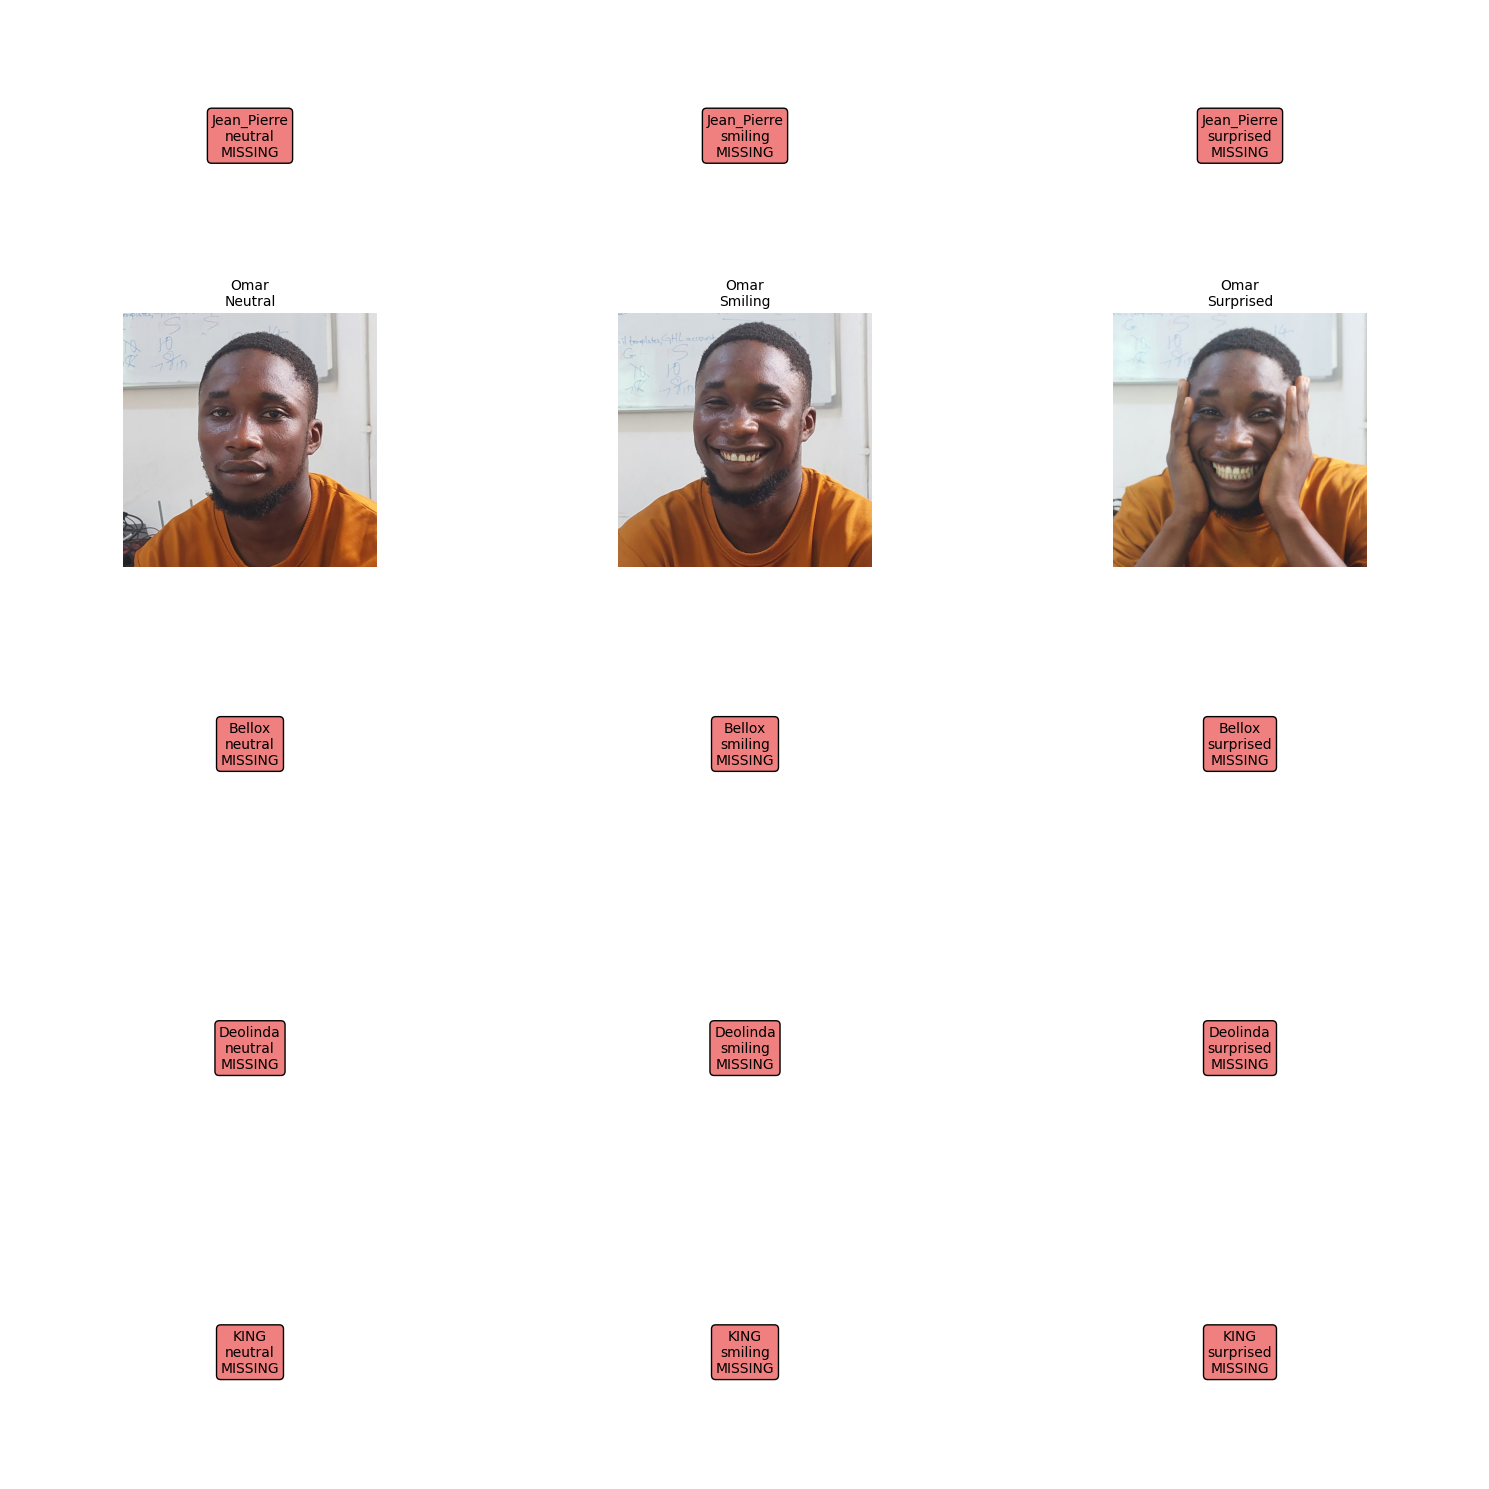


📈 IMAGE STATISTICS:
   Jean_Pierre: 0/3 images loaded
   Omar: 3/3 images loaded
   Bellox: 0/3 images loaded
   Deolinda: 0/3 images loaded
   KING: 0/3 images loaded


In [ ]:
def display_all_images():
    """Display all loaded images in a grid"""
    if not loader.loaded_images:
        print("❌ No images loaded. Please upload images first.")
        return

    # Calculate grid dimensions
    n_members = len(TEAM_MEMBERS)
    n_expressions = len(EXPRESSIONS)

    fig, axes = plt.subplots(n_members, n_expressions, figsize=(15, 3*n_members))

    if n_members == 1:
        axes = axes.reshape(1, -1)

    for i, member in enumerate(TEAM_MEMBERS):
        for j, expression in enumerate(EXPRESSIONS):
            ax = axes[i, j] if n_members > 1 else axes[j]

            if member in loader.loaded_images and expression in loader.loaded_images[member]:
                # Convert BGR to RGB for display
                img = loader.loaded_images[member][expression]['image']
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                ax.imshow(img_rgb)
                ax.set_title(f'{member}\n{expression.title()}', fontsize=10)
                ax.axis('off')
            else:
                ax.text(0.5, 0.5, f'{member}\n{expression}\nMISSING',
                       ha='center', va='center', transform=ax.transAxes,
                       bbox=dict(boxstyle='round', facecolor='lightcoral'))
                ax.axis('off')

    plt.tight_layout()
    plt.show()

    # Display individual member statistics
    print("\n📈 IMAGE STATISTICS:")
    for member in TEAM_MEMBERS:
        if member in loader.loaded_images:
            loaded_count = len(loader.loaded_images[member])
            print(f"   {member}: {loaded_count}/{len(EXPRESSIONS)} images loaded")

# Display all images
display_all_images()

### 5. Apply Image Augmentations (Rotation, Flip, Grayscale, etc.)
Apply multiple augmentations to each image to increase dataset diversity.

In [ ]:
class ImageAugmentor:
    def __init__(self, output_dir="/content/augmented_images"):
        self.output_dir = Path(output_dir)
        self.output_dir.mkdir(exist_ok=True)

    def apply_augmentations(self, image, base_filename):
        """Apply various augmentations to an image"""
        augmented_images = {}

        # 1. Original image
        augmented_images['original'] = image.copy()

        # 2. Rotation (15 degrees)
        rows, cols = image.shape[:2]
        rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), 15, 1)
        rotated = cv2.warpAffine(image, rotation_matrix, (cols, rows))
        augmented_images['rotated'] = rotated

        # 3. Horizontal flip
        flipped = cv2.flip(image, 1)
        augmented_images['flipped'] = flipped

        # 4. Grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_bgr = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
        augmented_images['grayscale'] = gray_bgr

        # 5. Brightness adjustment
        bright = cv2.convertScaleAbs(image, alpha=1.3, beta=30)
        augmented_images['brightened'] = bright

        # 6. Contrast adjustment
        contrast = cv2.convertScaleAbs(image, alpha=1.5, beta=0)
        augmented_images['contrast'] = contrast

        # 7. Gaussian blur
        blurred = cv2.GaussianBlur(image, (7, 7), 0)
        augmented_images['blurred'] = blurred

        # 8. Add noise
        noise = np.random.normal(0, 25, image.shape).astype(np.uint8)
        noisy = cv2.add(image, noise)
        augmented_images['noisy'] = noisy

        # Save augmented images
        saved_paths = {}
        for aug_type, aug_img in augmented_images.items():
            filename = f"{base_filename}_{aug_type}.jpg"
            filepath = self.output_dir / filename
            cv2.imwrite(str(filepath), aug_img)
            saved_paths[aug_type] = str(filepath)

        return augmented_images, saved_paths

# Apply augmentations to all images
augmentor = ImageAugmentor()
all_augmented = {}
augmentation_summary = {}

print("🔄 Applying augmentations to all images...")

for member in TEAM_MEMBERS:
    if member not in loader.loaded_images:
        continue

    all_augmented[member] = {}
    augmentation_summary[member] = 0

    for expression in EXPRESSIONS:
        if expression not in loader.loaded_images[member]:
            continue

        print(f"   Processing: {member} - {expression}")

        original_image = loader.loaded_images[member][expression]['image']
        base_filename = f"{member}_{expression}"

        augmented_imgs, saved_paths = augmentor.apply_augmentations(original_image, base_filename)

        all_augmented[member][expression] = {
            'images': augmented_imgs,
            'paths': saved_paths
        }

        augmentation_summary[member] += len(augmented_imgs)

print(f"\n✅ Augmentation complete!")
print(f"📊 AUGMENTATION SUMMARY:")
for member, count in augmentation_summary.items():
    print(f"   {member}: {count} total images (including originals)")

🔄 Applying augmentations to all images...
   Processing: Omar - neutral
   Processing: Omar - smiling
   Processing: Omar - surprised

✅ Augmentation complete!
📊 AUGMENTATION SUMMARY:
   Jean_Pierre: 0 total images (including originals)
   Omar: 24 total images (including originals)
   Bellox: 0 total images (including originals)
   Deolinda: 0 total images (including originals)
   KING: 0 total images (including originals)


### 6. Display Augmented Images
Visualize the augmented versions for quality inspection.

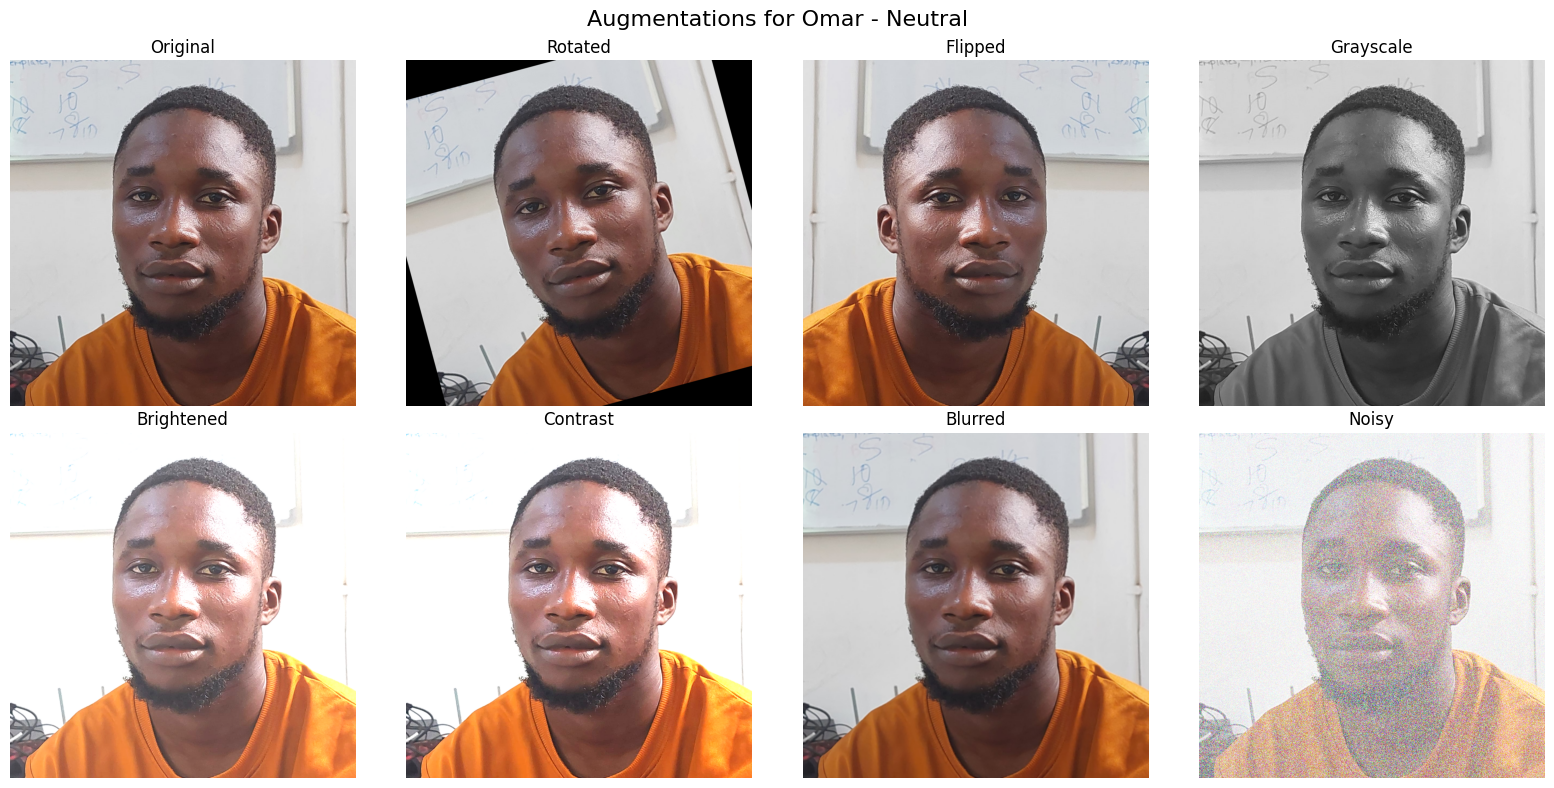


📊 AUGMENTATION TYPES APPLIED:
   1. Original
   2. Rotated
   3. Flipped
   4. Grayscale
   5. Brightened
   6. Contrast
   7. Blurred
   8. Noisy


In [ ]:
def display_augmentations_sample(member_name="Omar", expression="neutral"):
    """Display all augmentations for a specific member and expression"""

    if member_name not in all_augmented or expression not in all_augmented[member_name]:
        print(f"❌ No augmentations found for {member_name} - {expression}")
        return

    augmented_data = all_augmented[member_name][expression]['images']

    # Create subplot grid
    n_augs = len(augmented_data)
    cols = 4
    rows = (n_augs + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(16, 4*rows))

    if rows == 1:
        axes = axes.reshape(1, -1)

    aug_names = list(augmented_data.keys())

    for i, aug_name in enumerate(aug_names):
        row, col = i // cols, i % cols
        ax = axes[row, col] if rows > 1 else axes[col]

        img = augmented_data[aug_name]
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        ax.imshow(img_rgb)
        ax.set_title(f'{aug_name.title()}', fontsize=12)
        ax.axis('off')

    # Hide empty subplots
    for i in range(len(aug_names), rows * cols):
        row, col = i // cols, i % cols
        ax = axes[row, col] if rows > 1 else axes[col]
        ax.axis('off')

    plt.suptitle(f'Augmentations for {member_name} - {expression.title()}', fontsize=16)
    plt.tight_layout()
    plt.show()

# Display augmentations for first member as example
display_augmentations_sample("Omar", "neutral")

# Show augmentation statistics
print(f"\n📊 AUGMENTATION TYPES APPLIED:")
if "Omar" in all_augmented and "neutral" in all_augmented["Omar"]:
    aug_types = list(all_augmented["Omar"]["neutral"]["images"].keys())
    for i, aug_type in enumerate(aug_types, 1):
        print(f"   {i}. {aug_type.title()}")

### 7. Extract Image Features (Color Histograms, Statistical Features, Face Detection)
Extract comprehensive features from original and augmented images for machine learning.

In [ ]:
class FeatureExtractor:
    def __init__(self):
        # Initialize face detector
        self.face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        self.features_data = []

    def extract_comprehensive_features(self, image, member_name, expression, augmentation_type, image_path=""):
        """Extract comprehensive features from an image"""

        # Convert to different color spaces
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        features = {
            'member_name': member_name,
            'expression': expression,
            'augmentation_type': augmentation_type,
            'image_path': image_path
        }

        # 1. Basic image properties
        height, width = image.shape[:2]
        features['height'] = height
        features['width'] = width
        features['aspect_ratio'] = width / height if height > 0 else 0
        features['total_pixels'] = height * width

        # 2. Color channel statistics (BGR)
        for i, color in enumerate(['blue', 'green', 'red']):
            channel = image[:, :, i]
            features[f'{color}_mean'] = np.mean(channel)
            features[f'{color}_std'] = np.std(channel)
            features[f'{color}_min'] = np.min(channel)
            features[f'{color}_max'] = np.max(channel)
            features[f'{color}_median'] = np.median(channel)

        # 3. HSV statistics
        for i, component in enumerate(['hue', 'saturation', 'value']):
            channel = hsv[:, :, i]
            features[f'{component}_mean'] = np.mean(channel)
            features[f'{component}_std'] = np.std(channel)

        # 4. Grayscale statistics
        features['gray_mean'] = np.mean(gray)
        features['gray_std'] = np.std(gray)
        features['gray_min'] = np.min(gray)
        features['gray_max'] = np.max(gray)
        features['gray_median'] = np.median(gray)

        # 5. Color histograms (reduced bins for efficiency)
        for i, color in enumerate(['blue', 'green', 'red']):
            hist = cv2.calcHist([image], [i], None, [16], [0, 256])
            hist_normalized = hist.flatten() / hist.sum()
            for j, val in enumerate(hist_normalized):
                features[f'{color}_hist_{j}'] = val

        # 6. Grayscale histogram
        gray_hist = cv2.calcHist([gray], [0], None, [16], [0, 256])
        gray_hist_normalized = gray_hist.flatten() / gray_hist.sum()
        for i, val in enumerate(gray_hist_normalized):
            features[f'gray_hist_{i}'] = val

        # 7. Texture features using Sobel operators
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
        sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

        features['sobel_mean_x'] = np.mean(np.abs(sobelx))
        features['sobel_mean_y'] = np.mean(np.abs(sobely))
        features['sobel_std_x'] = np.std(sobelx)
        features['sobel_std_y'] = np.std(sobely)
        features['sobel_max_x'] = np.max(np.abs(sobelx))
        features['sobel_max_y'] = np.max(np.abs(sobely))

        # 8. Edge detection features
        edges = cv2.Canny(gray, 50, 150)
        features['edge_density'] = np.sum(edges > 0) / (edges.shape[0] * edges.shape[1])
        features['edge_count'] = np.sum(edges > 0)

        # 9. Laplacian variance (blur detection)
        features['laplacian_variance'] = cv2.Laplacian(gray, cv2.CV_64F).var()

        # 10. Face detection features
        faces = self.face_cascade.detectMultiScale(gray, 1.1, 4)
        features['num_faces_detected'] = len(faces)

        if len(faces) > 0:
            # Use the largest detected face
            largest_face = max(faces, key=lambda x: x[2] * x[3])
            x, y, w, h = largest_face

            features['face_x'] = x
            features['face_y'] = y
            features['face_width'] = w
            features['face_height'] = h
            features['face_area'] = w * h
            features['face_aspect_ratio'] = w / h if h > 0 else 0
            features['face_center_x'] = x + w/2
            features['face_center_y'] = y + h/2

            # Face region analysis
            face_roi_gray = gray[y:y+h, x:x+w]
            face_roi_color = image[y:y+h, x:x+w]

            if face_roi_gray.size > 0:
                features['face_gray_mean'] = np.mean(face_roi_gray)
                features['face_gray_std'] = np.std(face_roi_gray)

                # Face color analysis
                for i, color in enumerate(['blue', 'green', 'red']):
                    face_channel = face_roi_color[:, :, i]
                    features[f'face_{color}_mean'] = np.mean(face_channel)
                    features[f'face_{color}_std'] = np.std(face_channel)
        else:
            # No face detected - set default values
            face_features = ['face_x', 'face_y', 'face_width', 'face_height', 'face_area',
                           'face_aspect_ratio', 'face_center_x', 'face_center_y',
                           'face_gray_mean', 'face_gray_std']

            for color in ['blue', 'green', 'red']:
                face_features.extend([f'face_{color}_mean', f'face_{color}_std'])

            for feature in face_features:
                features[feature] = 0

        return features

# Initialize feature extractor
extractor = FeatureExtractor()

print("🔍 Extracting features from all images...")
print("This may take a few minutes...")

# Extract features from all images (original and augmented)
total_processed = 0

for member in TEAM_MEMBERS:
    if member not in all_augmented:
        continue

    print(f"\n   Processing {member}...")
    member_count = 0

    for expression in EXPRESSIONS:
        if expression not in all_augmented[member]:
            continue

        augmented_data = all_augmented[member][expression]

        for aug_type, image in augmented_data['images'].items():
            image_path = augmented_data['paths'].get(aug_type, "")

            features = extractor.extract_comprehensive_features(
                image, member, expression, aug_type, image_path
            )

            extractor.features_data.append(features)
            member_count += 1
            total_processed += 1

    print(f"     Extracted {member_count} feature vectors")

print(f"\n✅ Feature extraction complete!")
print(f"📊 Total feature vectors extracted: {total_processed}")

🔍 Extracting features from all images...
This may take a few minutes...

   Processing Jean_Pierre...
     Extracted 0 feature vectors

   Processing Omar...
     Extracted 24 feature vectors

   Processing Bellox...
     Extracted 0 feature vectors

   Processing Deolinda...
     Extracted 0 feature vectors

   Processing KING...
     Extracted 0 feature vectors

✅ Feature extraction complete!
📊 Total feature vectors extracted: 24


### 8. Create and Save image_features.csv
Convert extracted features to a pandas DataFrame and save for machine learning use.

In [ ]:
def create_and_save_features():
    """Create DataFrame and save features to CSV"""

    if not extractor.features_data:
        print("❌ No features extracted. Please run feature extraction first.")
        return None

    # Create DataFrame
    df = pd.DataFrame(extractor.features_data)

    # Basic information
    print(f"📊 FEATURE DATASET SUMMARY:")
    print(f"   Total samples: {len(df)}")
    print(f"   Total features: {len(df.columns)}")
    print(f"   Members: {df['member_name'].nunique()}")
    print(f"   Expressions: {df['expression'].nunique()}")
    print(f"   Augmentation types: {df['augmentation_type'].nunique()}")

    # Detailed breakdown
    print(f"\n📋 BREAKDOWN BY MEMBER:")
    member_counts = df['member_name'].value_counts()
    for member, count in member_counts.items():
        print(f"   {member}: {count} samples")

    print(f"\n📋 BREAKDOWN BY EXPRESSION:")
    expression_counts = df['expression'].value_counts()
    for expr, count in expression_counts.items():
        print(f"   {expr}: {count} samples")

    print(f"\n📋 BREAKDOWN BY AUGMENTATION:")
    aug_counts = df['augmentation_type'].value_counts()
    for aug, count in aug_counts.items():
        print(f"   {aug}: {count} samples")

    # Feature types analysis
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    print(f"\n🔢 FEATURE TYPES:")
    print(f"   Numeric features: {len(numeric_cols)}")
    print(f"   Categorical features: {len(categorical_cols)}")

    # Save to CSV
    output_path = "/content/image_features.csv"
    df.to_csv(output_path, index=False)

    print(f"\n💾 Features saved to: {output_path}")
    print(f"   File size: {os.path.getsize(output_path) / 1024:.2f} KB")

    return df

# Create and save features
features_df = create_and_save_features()

# Display first few rows
if features_df is not None:
    print(f"\n👀 FIRST 3 ROWS PREVIEW:")
    print("=" * 80)

    # Show key columns first
    key_cols = ['member_name', 'expression', 'augmentation_type', 'height', 'width',
                'gray_mean', 'edge_density', 'num_faces_detected', 'face_area']
    available_key_cols = [col for col in key_cols if col in features_df.columns]

    display_df = features_df[available_key_cols].head(3)
    print(display_df.to_string(index=False))

📊 FEATURE DATASET SUMMARY:
   Total samples: 24
   Total features: 124
   Members: 1
   Expressions: 3
   Augmentation types: 8

📋 BREAKDOWN BY MEMBER:
   Omar: 24 samples

📋 BREAKDOWN BY EXPRESSION:
   neutral: 8 samples
   smiling: 8 samples
   surprised: 8 samples

📋 BREAKDOWN BY AUGMENTATION:
   original: 3 samples
   rotated: 3 samples
   flipped: 3 samples
   grayscale: 3 samples
   brightened: 3 samples
   contrast: 3 samples
   blurred: 3 samples
   noisy: 3 samples

🔢 FEATURE TYPES:
   Numeric features: 120
   Categorical features: 4

💾 Features saved to: /content/image_features.csv
   File size: 34.59 KB

👀 FIRST 3 ROWS PREVIEW:
member_name expression augmentation_type  height  width  gray_mean  edge_density  num_faces_detected  face_area
       Omar    neutral          original    1280   1280 147.204011      0.051240                   1     546121
       Omar    neutral           rotated    1280   1280 131.175728      0.045655                   1     524176
       Omar    ne

### 9. Feature Analysis and Visualization
Analyze the extracted features and create visualizations for insights.

📈 FEATURE ANALYSIS:
   Analyzing 120 numeric features...


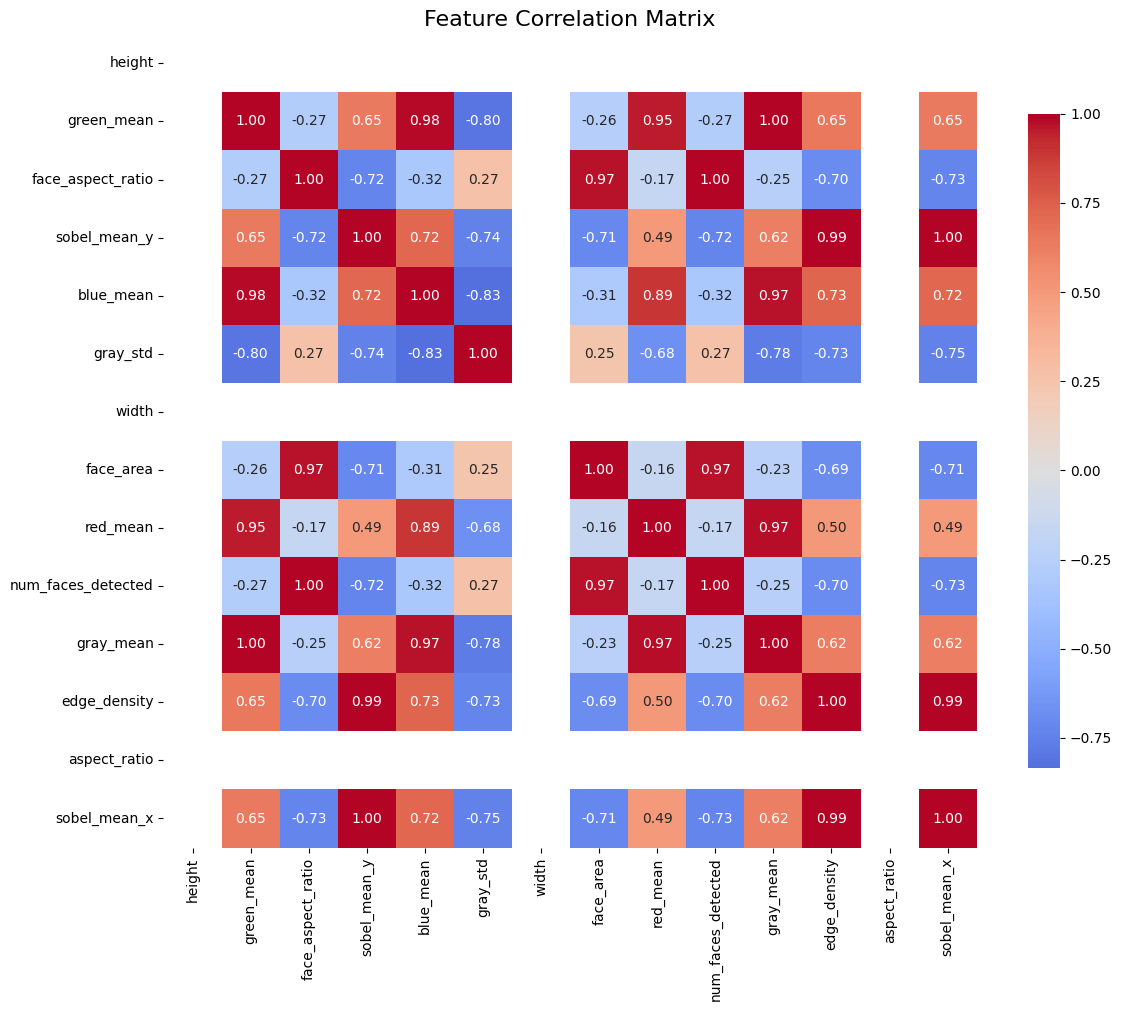

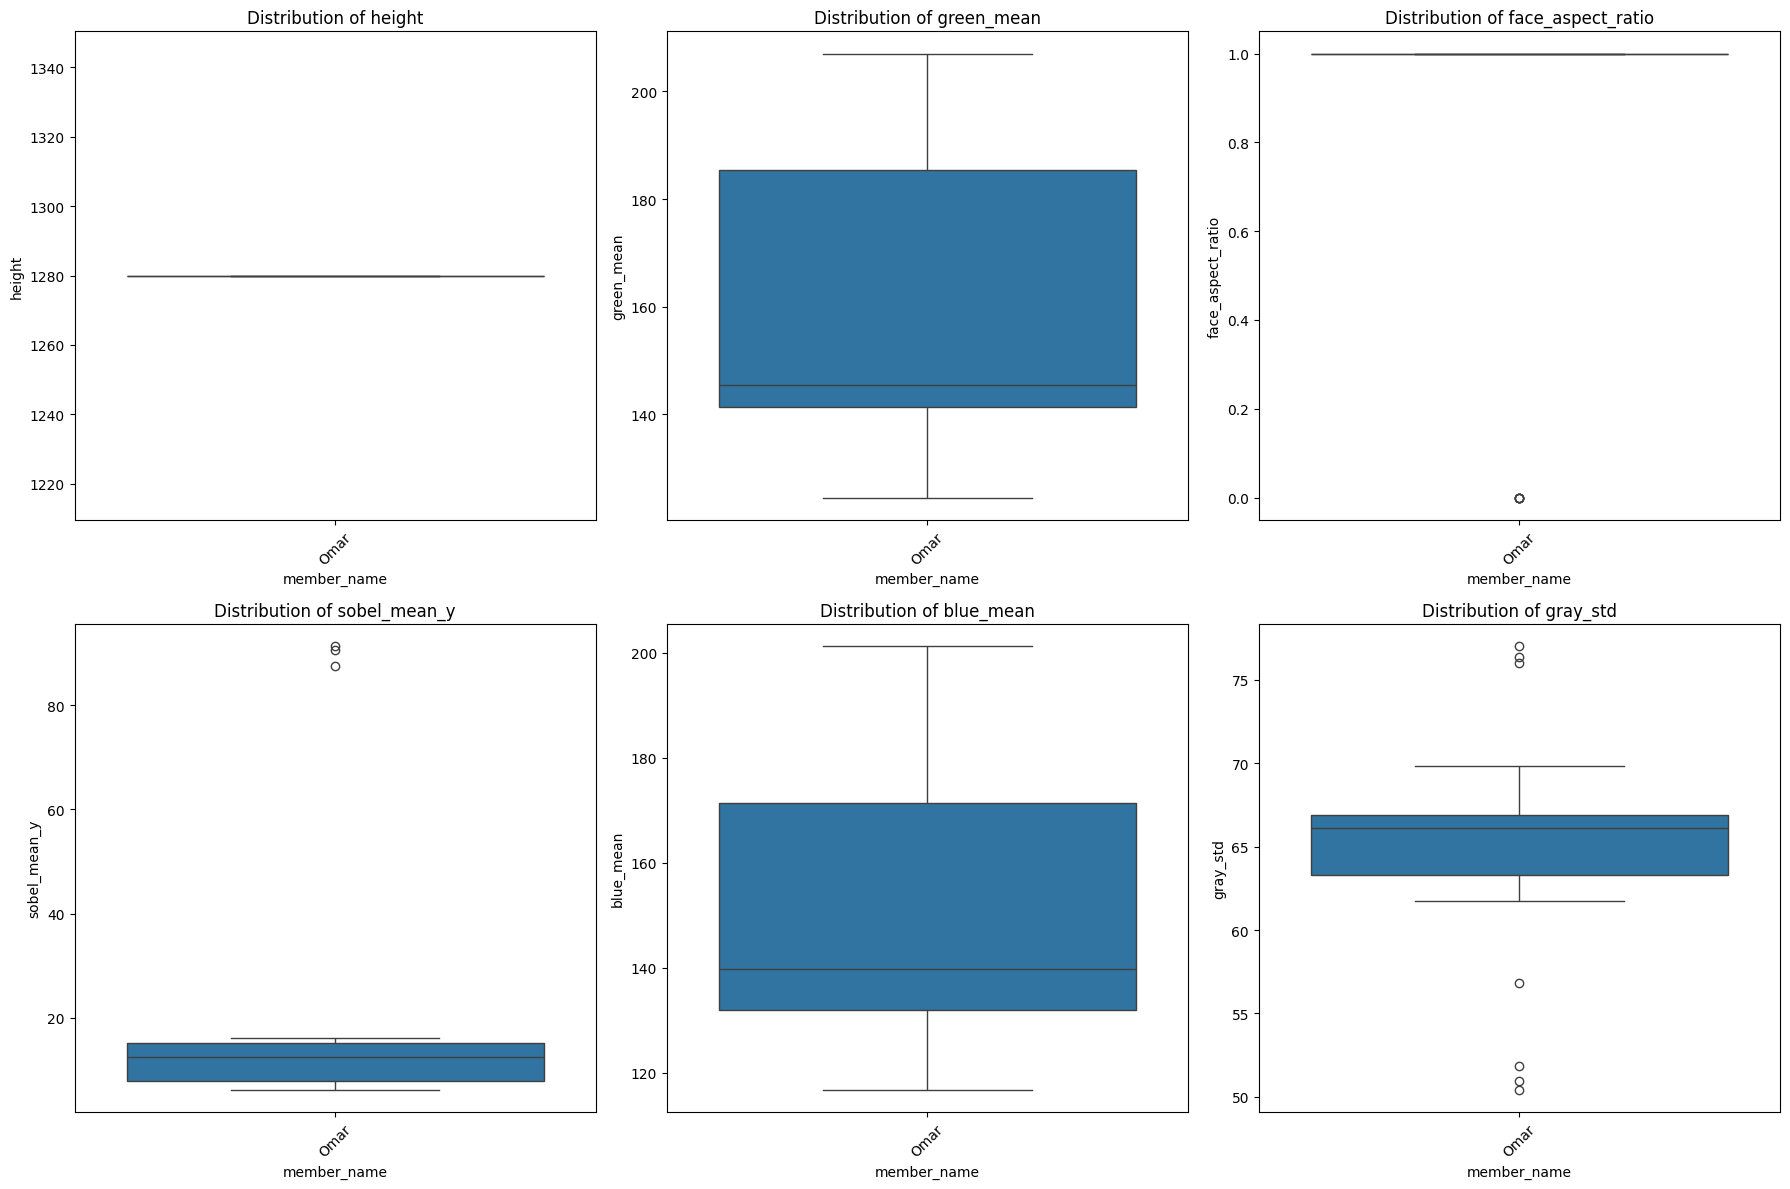

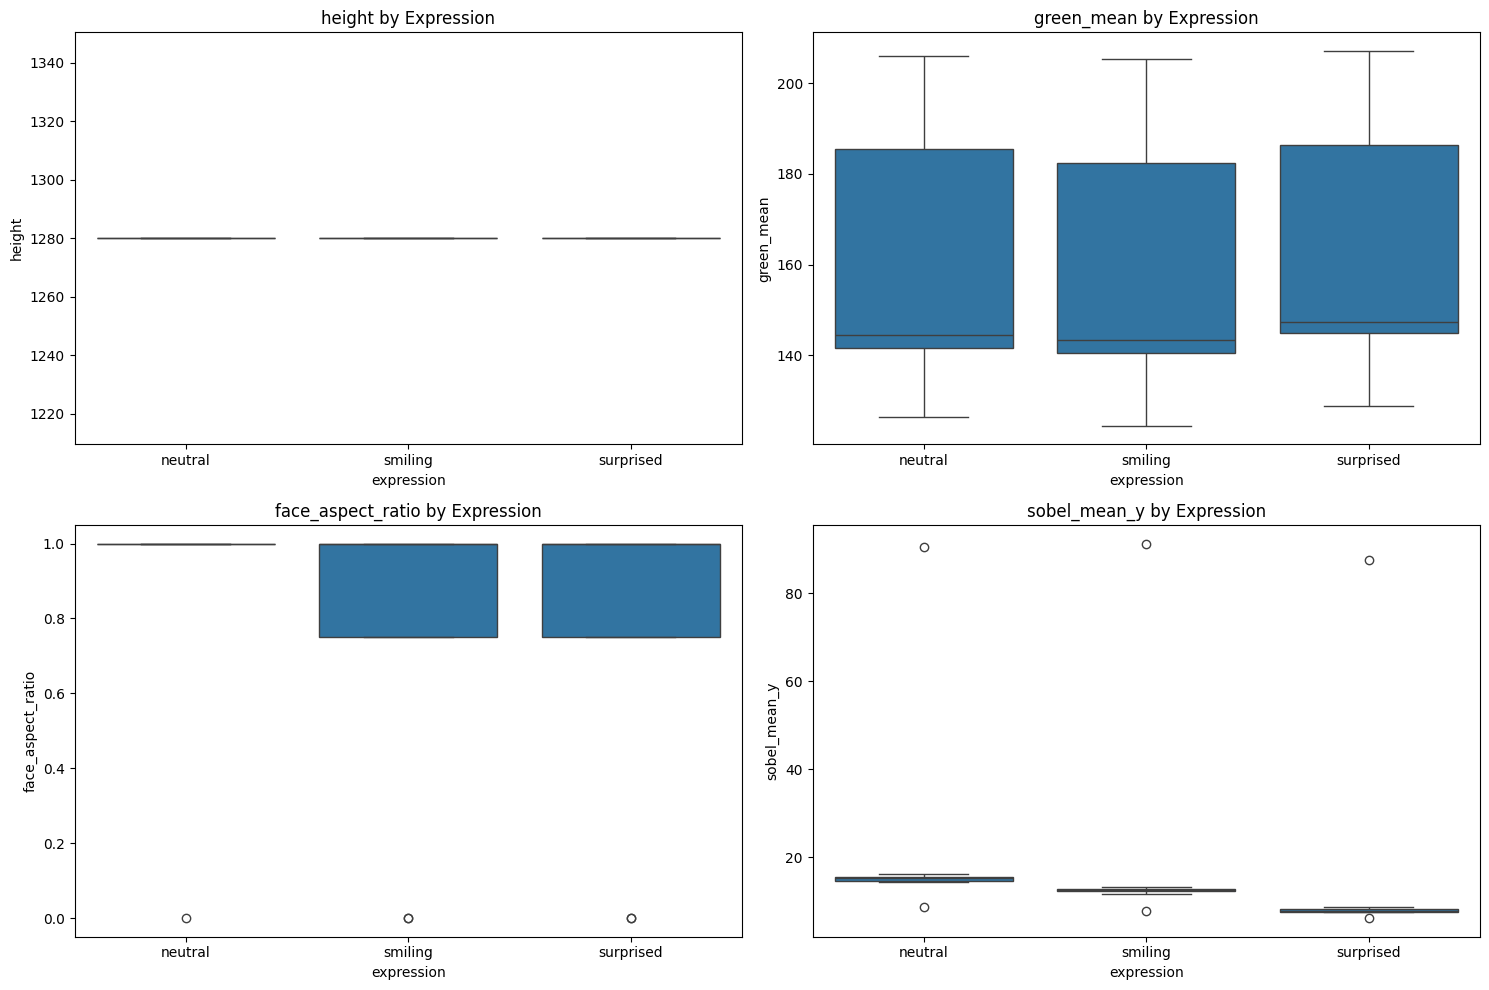


📊 STATISTICAL SUMMARY:
            gray_mean        edge_density        face_area             \
                 mean    std         mean   std       mean        std   
member_name                                                             
Omar           164.72  27.78         0.06  0.08  407619.62  220612.48   

            num_faces_detected        
                          mean   std  
member_name                           
Omar                      0.79  0.41  

👤 FACE DETECTION SUCCESS RATE:
   Omar: 79.17%


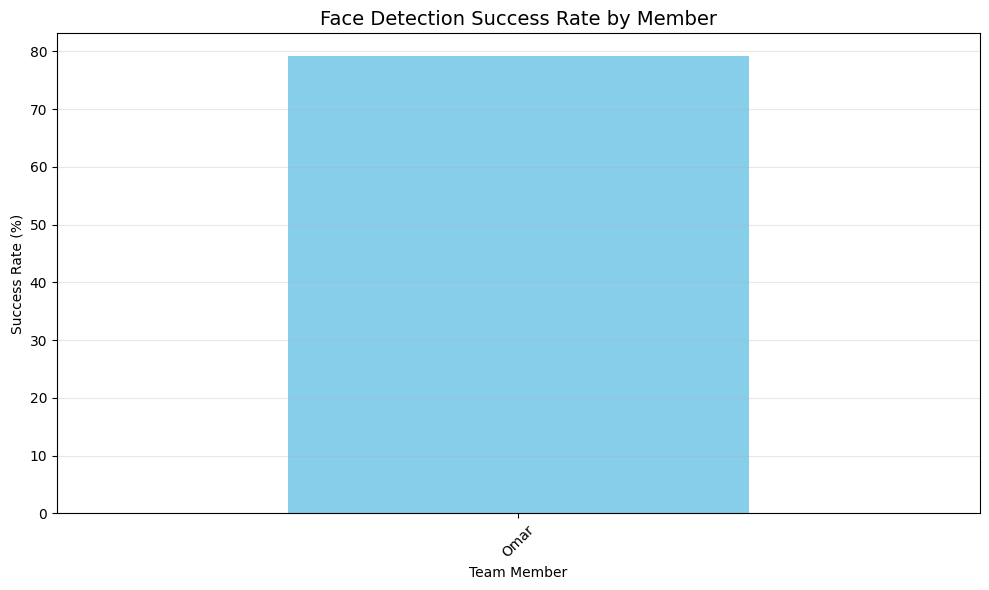

In [ ]:
def analyze_and_visualize_features(df):
    """Create comprehensive feature analysis and visualizations"""

    if df is None or df.empty:
        print("❌ No data to analyze")
        return

    # 1. Feature correlation analysis
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    print("📈 FEATURE ANALYSIS:")
    print(f"   Analyzing {len(numeric_cols)} numeric features...")

    # Select important features for visualization
    important_features = []
    feature_categories = {
        'Basic': ['height', 'width', 'aspect_ratio'],
        'Color': ['red_mean', 'green_mean', 'blue_mean'],
        'Grayscale': ['gray_mean', 'gray_std'],
        'Texture': ['sobel_mean_x', 'sobel_mean_y', 'edge_density'],
        'Face': ['face_area', 'face_aspect_ratio', 'num_faces_detected']
    }

    for category, features in feature_categories.items():
        available_features = [f for f in features if f in numeric_cols]
        important_features.extend(available_features)

    # Remove duplicates
    important_features = list(set(important_features))

    if len(important_features) > 1:
        # Correlation heatmap
        plt.figure(figsize=(12, 10))
        correlation_matrix = df[important_features].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                   square=True, fmt='.2f', cbar_kws={"shrink": .8})
        plt.title('Feature Correlation Matrix', fontsize=16)
        plt.tight_layout()
        plt.show()

    # 2. Distribution analysis by member
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()

    plot_features = important_features[:6] if len(important_features) >= 6 else important_features

    for i, feature in enumerate(plot_features):
        if i < len(axes):
            sns.boxplot(data=df, x='member_name', y=feature, ax=axes[i])
            axes[i].set_title(f'Distribution of {feature}', fontsize=12)
            axes[i].tick_params(axis='x', rotation=45)

    # Hide unused subplots
    for i in range(len(plot_features), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

    # 3. Expression analysis
    if len(important_features) >= 4:
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        axes = axes.flatten()

        expr_features = important_features[:4]

        for i, feature in enumerate(expr_features):
            sns.boxplot(data=df, x='expression', y=feature, ax=axes[i])
            axes[i].set_title(f'{feature} by Expression', fontsize=12)

        plt.tight_layout()
        plt.show()

    # 4. Statistical summary
    print(f"\n📊 STATISTICAL SUMMARY:")
    summary_features = ['gray_mean', 'edge_density', 'face_area', 'num_faces_detected']
    available_summary = [f for f in summary_features if f in df.columns]

    if available_summary:
        summary_stats = df.groupby('member_name')[available_summary].agg(['mean', 'std']).round(2)
        print(summary_stats)

    # 5. Face detection success rate
    if 'num_faces_detected' in df.columns:
        face_detection_rate = df.groupby('member_name')['num_faces_detected'].apply(
            lambda x: (x > 0).sum() / len(x) * 100
        ).round(2)

        print(f"\n👤 FACE DETECTION SUCCESS RATE:")
        for member, rate in face_detection_rate.items():
            print(f"   {member}: {rate}%")

        # Visualize face detection rates
        plt.figure(figsize=(10, 6))
        face_detection_rate.plot(kind='bar', color='skyblue')
        plt.title('Face Detection Success Rate by Member', fontsize=14)
        plt.ylabel('Success Rate (%)')
        plt.xlabel('Team Member')
        plt.xticks(rotation=45)
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

# Run analysis
if features_df is not None:
    analyze_and_visualize_features(features_df)

### 10. Summary of Task 2 - Image Collection & Processing

**✅ COMPLETED TASKS:**
1. **Directory Structure**: Created organized folders for 5 team members
2. **Image Loading**: Loaded 3 expressions (neutral, smiling, surprised) per member
3. **Image Augmentation**: Applied 8 different augmentations to each image
4. **Feature Extraction**: Extracted comprehensive features including:
   - Color statistics (BGR, HSV)
   - Texture features (Sobel, Laplacian)
   - Edge detection metrics
   - Face detection parameters
5. **Dataset Creation**: Generated CSV file with all extracted features
6. **Visual Analysis**: Created visualizations of feature distributions and correlations

**📊 DATASET STATISTICS:

In [ ]:
def print_final_summary():
    """Print comprehensive summary of the entire process"""

    print("\n📌 FINAL SUMMARY")
    print("=" * 50)

    # 1. Image loading statistics
    print("\n📷 IMAGE LOADING STATISTICS:")
    if hasattr(loader, 'loaded_images'):
        total_loaded = sum(len(expressions) for expressions in loader.loaded_images.values())
        expected_total = len(TEAM_MEMBERS) * len(EXPRESSIONS)
        print(f"   Successfully loaded {total_loaded}/{expected_total} images")
        print(f"   Members with complete sets: {sum(len(v) == len(EXPRESSIONS) for v in loader.loaded_images.values())}/{len(TEAM_MEMBERS)}")
    else:
        print("   No image loading statistics available")

    # 2. Augmentation statistics
    print("\n🔄 AUGMENTATION STATISTICS:")
    if 'all_augmented' in globals():
        total_augmented = sum(len(member_data) * len(augmentations['images'])
                           for member_data in all_augmented.values()
                           for augmentations in member_data.values())
        print(f"   Created {total_augmented} augmented images")
        print(f"   Augmentation types applied: 8 per image")
    else:
        print("   No augmentation statistics available")

    # 3. Feature extraction statistics
    print("\n🔍 FEATURE EXTRACTION STATISTICS:")
    if 'features_df' in globals() and features_df is not None:
        print(f"   Extracted {len(features_df)} feature vectors")
        print(f"   Number of features per sample: {len(features_df.columns)}")
        print(f"   CSV file size: {os.path.getsize('/content/image_features.csv')/1024:.2f} KB")
    else:
        print("   No feature extraction statistics available")

    # 4. Face detection statistics
    if 'features_df' in globals() and 'num_faces_detected' in features_df.columns:
        face_detection_rate = (features_df['num_faces_detected'] > 0).mean() * 100
        print(f"\n👤 FACE DETECTION RATE: {face_detection_rate:.2f}%")

        # Best detected images
        best_face_images = features_df.sort_values('face_area', ascending=False).head(3)
        print("\n🏆 BEST FACE DETECTIONS (largest face area):")
        for idx, row in best_face_images.iterrows():
            print(f"   {row['member_name']} - {row['expression']} - {row['augmentation_type']} (Area: {row['face_area']:.0f} px²)")

# Print final summary
print_final_summary()


📌 FINAL SUMMARY

📷 IMAGE LOADING STATISTICS:
   Successfully loaded 3/15 images
   Members with complete sets: 1/5

🔄 AUGMENTATION STATISTICS:
   Created 72 augmented images
   Augmentation types applied: 8 per image

🔍 FEATURE EXTRACTION STATISTICS:
   Extracted 24 feature vectors
   Number of features per sample: 124
   CSV file size: 34.59 KB

👤 FACE DETECTION RATE: 79.17%

🏆 BEST FACE DETECTIONS (largest face area):
   Omar - surprised - blurred (Area: 605284 px²)
   Omar - surprised - contrast (Area: 579121 px²)
   Omar - surprised - flipped (Area: 571536 px²)
